In [9]:
import astropy.constants as const
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from plotting import label_axes

In [10]:
T_CMB = 2.725 * u.K

# Geminga halo size


In [11]:
D_Geminga = 250 * u.pc
theta_halo = 5.5 * u.deg

L_halo = (D_Geminga * theta_halo).to(u.pc, equivalencies=u.dimensionless_angles())

print(f"Halo size: {L_halo:.4f}")

Halo size: 23.9983 pc


# Halo's diffusion coefficient


Required diffusion coeff = 3.41 * Bohm


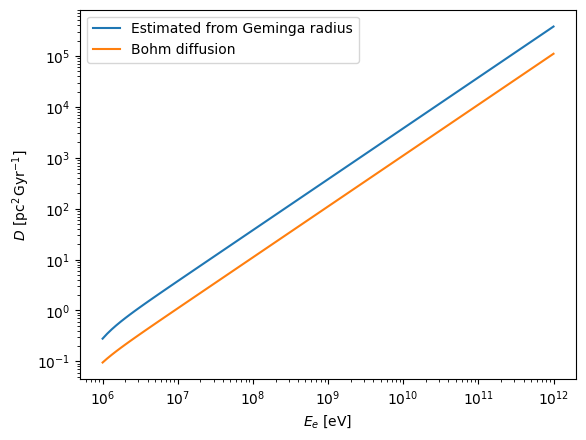

In [12]:
from utils import (
    black_body_energy_density,
    bohm_diffusion_coeff,
    energy_loss_rate,
    gauss_cgs,
)


E_e_grid = np.logspace(6, 12, 100) * u.eV

P_IC_on_CMB = energy_loss_rate(
    proc="ic",
    U=black_body_energy_density(T=T_CMB),
    E=E_e_grid,
)
tau = E_e_grid / P_IC_on_CMB

D_est = (L_halo**2 / tau).to(u.pc**2 / u.Gyr)
D_Bohm = bohm_diffusion_coeff(E_e_grid, B=1e-6 * gauss_cgs)
print(f"Required diffusion coeff = {np.mean(D_est / D_Bohm):.2f} * Bohm")

fig, ax = plt.subplots()
ax.loglog(E_e_grid, D_est, label="Estimated from Geminga radius")
ax.plot(E_e_grid, D_Bohm, label="Bohm diffusion")
ax.legend()
label_axes(ax, "E_e", "D")
plt.show()

# KN-regime $\gamma$-ray emission

KN regime requirement: $\gamma \epsilon_i \gg m_e c^2$. Since the target photon field is CMB with $\epsilon_i \approx k_B T_{CMB}$, the KN regime is realized if electron energy is high enough, so that $\gamma \gg \frac{m_e c^2}{\epsilon_i} \to E_e \gg \frac{m_e^2 c^4}{k_B T_{CMB}}$

In [14]:
E_e_KN = ((const.m_e * const.c ** 2) ** 2 / (const.k_B * T_CMB)).to(u.PeV)

print(f"KN regime is realized for electrons with E >> {E_e_KN:.2f}")

KN regime is realized for electrons with E >> 1.11 PeV
